Rozmiar X: (170, 256)
max|C_col_svd - C_col_direct| = 2.60770320892334e-08
max|C_row_svd - C_row_direct| = 3.725290298461914e-08


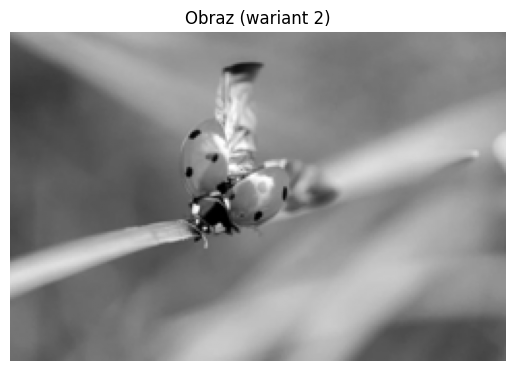

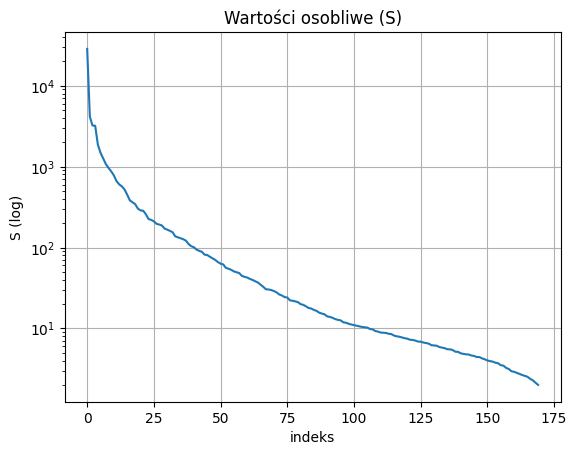

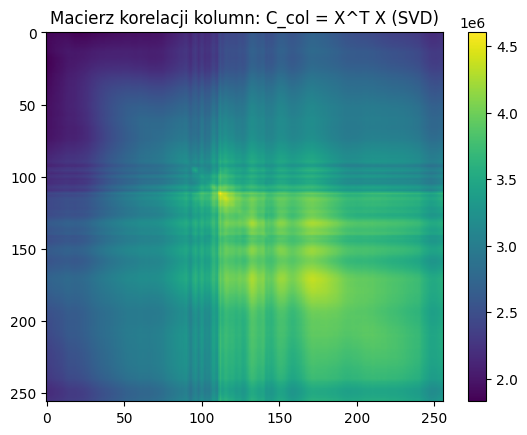

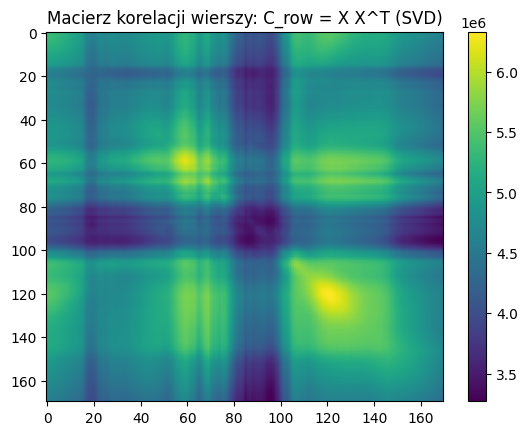

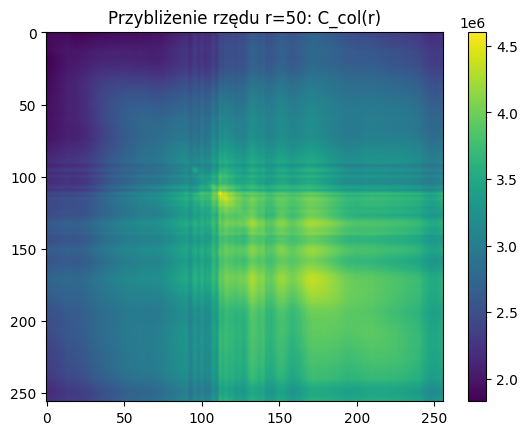

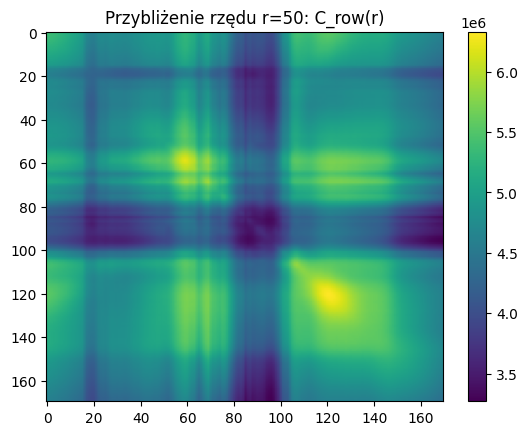

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


IMAGE_PATH = "2.webp"  
MAX_SIZE = 256                 
RANK_R = 50                


def load_image_as_matrix(path, max_size=256):
    img = Image.open(path).convert("L") 
    w, h = img.size
    scale = min(max_size / w, max_size / h, 1.0)
    img = img.resize((int(w*scale), int(h*scale)))
    X = np.asarray(img, dtype=np.float64)
    return X

X = load_image_as_matrix(IMAGE_PATH, MAX_SIZE)
n, m = X.shape
print("Rozmiar X:", X.shape)

U, S, Vt = np.linalg.svd(X, full_matrices=False)
Sigma2 = np.diag(S**2)


C_col_svd = Vt.T @ Sigma2 @ Vt  
C_row_svd = U @ Sigma2 @ U.T      


C_col_direct = X.T @ X
C_row_direct = X @ X.T
print("max|C_col_svd - C_col_direct| =", np.max(np.abs(C_col_svd - C_col_direct)))
print("max|C_row_svd - C_row_direct| =", np.max(np.abs(C_row_svd - C_row_direct)))


r = min(RANK_R, len(S))
Ur = U[:, :r]
Sr2 = np.diag(S[:r]**2)
VrT = Vt[:r, :]

C_col_r = VrT.T @ Sr2 @ VrT
C_row_r = Ur @ Sr2 @ Ur.T


plt.figure()
plt.title("Obraz (wariant 2)")
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.show()

plt.figure()
plt.title("Wartości osobliwe (S)")
plt.plot(S)
plt.yscale("log")
plt.xlabel("indeks")
plt.ylabel("S (log)")
plt.grid(True)
plt.show()

plt.figure()
plt.title("Macierz korelacji kolumn: C_col = X^T X (SVD)")
plt.imshow(C_col_svd, aspect="auto")
plt.colorbar()
plt.show()

plt.figure()
plt.title("Macierz korelacji wierszy: C_row = X X^T (SVD)")
plt.imshow(C_row_svd, aspect="auto")
plt.colorbar()
plt.show()

plt.figure()
plt.title(f"Przybliżenie rzędu r={r}: C_col(r)")
plt.imshow(C_col_r, aspect="auto")
plt.colorbar()
plt.show()

plt.figure()
plt.title(f"Przybliżenie rzędu r={r}: C_row(r)")
plt.imshow(C_row_r, aspect="auto")
plt.colorbar()
plt.show()
